## Exploratory Data Analysis (EDA)

Goal - Create a similarity metric based on just the numerical data (elevation gain, distance, star rating)

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

### READ IN PICKLE DATA FILE

In [93]:
#Read in pickle data file
data=pd.read_pickle('../data/alltrails_ontario.pkl')

### CURATION
1. Change trail attributes to string for TF-IDF
2. Remove nan from elevation data

In [94]:
#Replace nan with 0. - I had to do this since elevation had a few rows with nan
data.elevation[np.isnan(data.elevation)]=0.
data_copy=data.copy()
# data.distance.astype('float')
# data.dtypes

C:\Users\chtra\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
#Curate trail attributes to create single words for each array element
trail_attributes=data.trail_attributes
hattrib=[]
for l1 in trail_attributes:
    hattrib.append([l2.replace(' ', '') for l2 in l1])
print (hattrib[0])

# Add the curated attibutes as a new column ('tags') in data
data['tags']=pd.Series(hattrib)
#convert list of strings to text - this is necessary for running TFIDF
data['tags']=[' '.join(tag) for tag in data.tags.values]
# data.elevation[628]
data.tags[0]
# data[data['elevation']==0]
data.head(5)

['dogsonleash', 'wheelchairfriendly', 'kidfriendly', 'strollerfriendly', 'hiking', 'mountainbiking', 'naturetrips', 'snowshoeing', 'trailrunning', 'walking', 'forest', 'paved', 'views', 'snow']


,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,tags
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",dogsonleash wheelchairfriendly kidfriendly str...
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",dogsonleash crosscountryskiing fishing hiking ...
2,MODERATE,2.3,100.0,Niagara Glen Trail,135,Beautiful area with several trails. Loved exp...,Loop,4.7,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips wal...
3,MODERATE,7.2,128.0,Nassagaweya and Bruce Trail Loop from Rattlesn...,170,Great views! We went in January so there weren...,Loop,4.2,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips sno...
4,MODERATE,15.3,427.0,Lion's Head Loop Via Bruce Trail,117,Amazing trail with stunning lookouts. Hiked it...,Loop,4.8,"[dogs on leash, hiking, nature trips, walking,...",dogsonleash hiking naturetrips walking birdwat...


In [96]:
#Convert difficulty rating to a 2D array (Easy-[1,0], moderate-[1,1], hard-[0,1])
difficulty=data.difficulty
arr=[]
for i in difficulty:
    if i=='EASY':
        arr.append([1,0])
    elif i=='MODERATE':
        arr.append([1,1])
    elif i=='HARD':
        arr.append([0,1])
# arr
data['num_difficulty']=arr
data.head(5)

,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,tags,num_difficulty
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",dogsonleash wheelchairfriendly kidfriendly str...,"[1, 1]"
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",dogsonleash crosscountryskiing fishing hiking ...,"[1, 1]"
2,MODERATE,2.3,100.0,Niagara Glen Trail,135,Beautiful area with several trails. Loved exp...,Loop,4.7,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips wal...,"[1, 1]"
3,MODERATE,7.2,128.0,Nassagaweya and Bruce Trail Loop from Rattlesn...,170,Great views! We went in January so there weren...,Loop,4.2,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips sno...,"[1, 1]"
4,MODERATE,15.3,427.0,Lion's Head Loop Via Bruce Trail,117,Amazing trail with stunning lookouts. Hiked it...,Loop,4.8,"[dogs on leash, hiking, nature trips, walking,...",dogsonleash hiking naturetrips walking birdwat...,"[1, 1]"


### Check numerical data


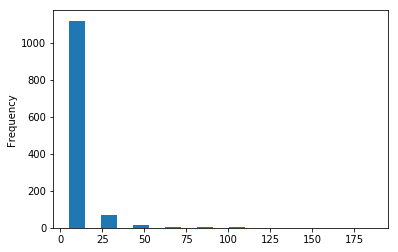

In [97]:
d=data.distance
d.plot(kind='hist', rwidth=0.5) #, bins=[0,10,20,30,40,50,60,70,80])

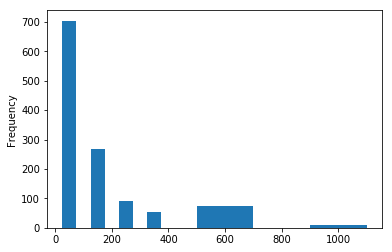

In [98]:
e=data.elevation
e.plot(kind='hist',bins=[0,100, 200, 300, 400,800,1200], rwidth=0.5)

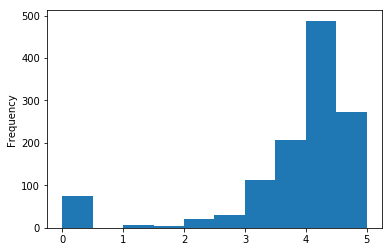

In [99]:
s=data.stars
s.plot(kind='hist')

In [122]:
# Create scaling for numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder ,LabelBinarizer
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
data_numerical=data[['elevation','distance','stars']]
scale_numerical=StandardScaler().fit(data_numerical)
data_num_scaled=scale_numerical.transform(data_numerical)
# print (data_num_scaled[:3])
# data_num_scaled.shape

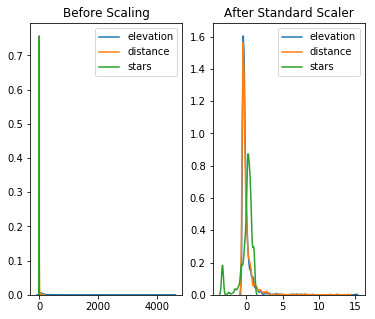

In [123]:
#StandardScaling - Good for data with normal distribution
numerical_data=data[['elevation','distance','stars']]

scaler=StandardScaler()
scaled_snd=scaler.fit_transform(numerical_data)
scaled_snd=pd.DataFrame(scaled_snd, columns=['elevation','distance','stars'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['elevation'], ax=ax1)
sns.kdeplot(data['distance'], ax=ax1)
sns.kdeplot(data['stars'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_snd['elevation'], ax=ax2)
sns.kdeplot(scaled_snd['distance'], ax=ax2)
sns.kdeplot(scaled_snd['stars'], ax=ax2)
plt.show()

In [124]:
numerical_data
dmean=np.mean(numerical_data)
dstd=np.std(numerical_data)
print (dmean, dstd)

dt=[18]
sc=(dt-dmean)/dstd
print (sc)

elevation    157.383185
distance       8.392955
stars          3.768230
dtype: float64 elevation    291.590267
distance      13.018684
stars          1.154356
dtype: float64
elevation    -0.478010
distance      0.737943
stars        12.328751
dtype: float64


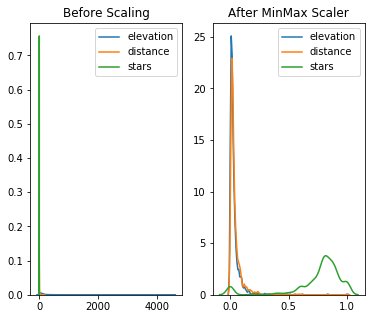

In [125]:
#MinMaxscaling
numerical_data=data[['elevation','distance','stars']]

scaler=MinMaxScaler()
scaled_nd=scaler.fit_transform(numerical_data)
scaled_nd=pd.DataFrame(scaled_nd, columns=['elevation','distance','stars'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['elevation'], ax=ax1)
sns.kdeplot(data['distance'], ax=ax1)
sns.kdeplot(data['stars'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_nd['elevation'], ax=ax2)
sns.kdeplot(scaled_nd['distance'], ax=ax2)
sns.kdeplot(scaled_nd['stars'], ax=ax2)
plt.show()

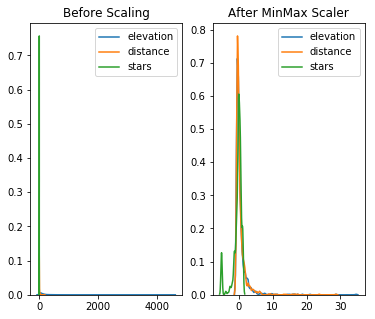

In [126]:
#RobustScaling - Suitable when there are outliers in the data

numerical_data=data[['elevation','distance','stars']]

scaler=RobustScaler()
scaled_nd=scaler.fit_transform(numerical_data)
scaled_nd=pd.DataFrame(scaled_nd, columns=['elevation','distance','stars'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['elevation'], ax=ax1)
sns.kdeplot(data['distance'], ax=ax1)
sns.kdeplot(data['stars'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_nd['elevation'], ax=ax2)
sns.kdeplot(scaled_nd['distance'], ax=ax2)
sns.kdeplot(scaled_nd['stars'], ax=ax2)
plt.show()

##  Testing cosine similarity with just the distance


In [127]:
#RobustScaling - Suitable when there are outliers in the data

numerical_data=data[['distance']]

scaler=RobustScaler()
scaled_rnd=scaler.fit_transform(numerical_data)
scaled_rnd=pd.DataFrame(scaled_nd, columns=['distance'])
# scaled_rnd

In [128]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
#Looks like robustscaling is better for my data

scaled_nd
cs_rnd=cosine_similarity(scaled_nd,scaled_nd)
cs_rnd[0]

array([ 1.        , -0.39123622, -0.8115597 , ...,  0.71661821,
        0.7339096 ,  0.20930556])

In [129]:
d1=[[10]]
d1s=scaler.fit_transform(d1)
d=data.distance
csm=cosine_similarity(d1,d.values.reshape(-1,1))
# csm
dfd=pd.DataFrame({'csm':csm[0]})
csm=(csm.reshape(-1,1)).tolist()
sorted_dfd=dfd.sort_values(by='csm',ascending=False)
# print (df.sort_values(by='csim',ascending=False))

csm
dfd.head()
sorted_dfd.head()
d1s
# data[235]
# data.iloc[0]

array([[0.]])

### END OF TEST

In [130]:
#Testing - 
# params=[[200,8,4]]
params=[[5.6,32,3]]
csim=cosine_similarity(params,scaled_nd)
df=pd.DataFrame({'csim':csim[0]})
csim=(csim.reshape(-1,1)).tolist()
sorted_df=df.sort_values(by='csim',ascending=False)
# print (df.sort_values(by='csim',ascending=False))

csim
df.head()
sorted_df.head()
# data[235]
# data.iloc[235]

,csim
240,0.999717
181,0.999550
214,0.999151
298,0.994373
517,0.994346


In [131]:
# Import essential modules
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder

In [132]:
#Vectorize tags
tv=TfidfVectorizer()
tv_matrix = tv.fit_transform(data['tags'])
cosine_sim_tags = cosine_similarity(tv_matrix, tv_matrix)
cosine_sim_tags.shape
# print (cosine_sim[1][4], len(cosine_sim[0]), len(cosine_sim))
cosine_sim_tags[0,1110:]

array([0.18367581, 0.59676552, 0.23261501, 0.29289064, 0.13896483,
       0.4657896 , 0.17478295, 0.37330009, 0.17794024, 0.12877595,
       0.28561971, 0.41058608, 0.38010594, 0.33239734, 0.04828691,
       0.10341602, 0.06287912, 0.12858908, 0.3849361 , 0.23213758,
       0.41129109, 0.16868769, 0.20911214, 0.1843822 , 0.27361407,
       0.22543106, 0.19293309, 0.33087777, 0.1503317 , 0.2504812 ,
       0.18632794, 0.12031449, 0.32465456, 0.33690484, 0.36585144,
       0.35055771, 0.15204904, 0.28891288, 0.28557764, 0.03371356,
       0.65590268, 0.28999029, 0.24279855, 0.19787747, 0.34418901,
       0.30175626, 0.11632172, 0.16408624, 0.32194278, 0.10950119,
       0.07686723, 0.49854098, 0.31143433, 0.22992231, 0.19885514,
       0.21914115, 0.67335096, 0.15904184, 0.3812544 , 0.3108447 ,
       0.64762743, 0.28561971, 0.17898187, 0.2138648 , 0.24768236,
       0.36585144, 0.35173618, 0.35173618, 0.41898778, 0.31855181,
       0.30529459, 0.65922408, 0.08741758, 0.09856034, 0.34312

In [133]:
#Vectorize tags - Test - Seems to be ok?!
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tv=TfidfVectorizer()
tg=['pf river wheelchair', 'pf river train', 'train wheelchair']
tv_matrix = tv.fit_transform(tg)
cosine_sim_tags = cosine_similarity(tv_matrix, tv_matrix)
cosine_sim_tags.shape
cosine_sim_tags
# tv_matrix

array([[1.        , 0.66666667, 0.40824829],
       [0.66666667, 1.        , 0.40824829],
       [0.40824829, 0.40824829, 1.        ]])

In [134]:
tst_tags=['pf train']
trail_matrix=TfidfVectorizer().fit_transform(tg)
tst_vect=TfidfVectorizer().fit_transform(tst_tags)
trail_matrix.shape, tst_vect.shape
trail_matrix, tst_vect
# cos_sim_tst=cosine_similarity(trail_matrix,tst_vect)

(<3x4 sparse matrix of type '<class 'numpy.float64'>'
 	with 8 stored elements in Compressed Sparse Row format>,
 <1x2 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>)

In [135]:
#Vectorize difficulty
difficulty=data[['difficulty']]
difficulty=difficulty.astype('category')
# difficulty.dtypes

lbd=LabelBinarizer() #.fit(difficulty)
# lbd
diffic_cat=lbd.fit_transform(difficulty)
scaler_diffic=StandardScaler().fit_transform(diffic_cat)
# diffic_scaled=scaler_diffic.transform(diffic_cat)
# diffic_scaled[:10]
# scaler_diffic
diffic_cat[8:11]
# difficulty[8:11]

cosine_sim_difficulty=cosine_similarity(scaler_diffic,scaler_diffic)
# num_difficulty
cosine_sim_difficulty
x=np.asarray(ndiffic)
# print(x)

C:\Users\chtra\Anaconda3.6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\chtra\Anaconda3.6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [150]:
#Vectorize difficulty
difficulty=data[['difficulty']]
difficulty=difficulty.astype('category')

# difficulty.dtypes
lbd=LabelBinarizer(neg_label=0, pos_label=1,sparse_output=False) #.fit(difficulty)
# lbd
diffic_cat=lbd.fit_transform(difficulty)
scaler_diffic=StandardScaler().fit_transform(diffic_cat)
# diffic_scaled=scaler_diffic.transform(diffic_cat)
# diffic_scaled[:10]
# scaler_diffic
diffic_cat[8:11]
# difficulty[8:11]

cosine_sim_difficulty=cosine_similarity(scaler_diffic,scaler_diffic)
# num_difficulty
cosine_sim_difficulty.shape
# x=np.asarray(ndiffic)
# print(x)
# diffic_cat[8:11]

C:\Users\chtra\Anaconda3.6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\chtra\Anaconda3.6\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(1215, 1215)

In [137]:
d=d=['easy','easy','hard','moderate','hard','easy','moderate']
di=d=[[1,0],[1,0],[0,1],[1,1],[0,1],[1,0],[1,1]]
# dlbd=LabelBinarizer().fit_transform(d)
sdlbd=StandardScaler().fit_transform(di)
sdlbd[0]
# csim=cosine_similarity()

array([ 0.63245553, -1.15470054])

In [138]:
#Vectorize reviews
reviews=data.review
reviews=reviews.str.lower()
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace("\'", '')
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace('\!', '')
reviews=reviews.str.replace('\/', ' ')
reviews=reviews.str.replace(',', '')
reviews=reviews.str.replace('(', '')
reviews=reviews.str.replace(')', '')
reviews=reviews.str.replace('.', '')
reviews=reviews.str.replace('\d+', '')
rtfidf=TfidfVectorizer(stop_words='english')
rtfidf_matrix=rtfidf.fit_transform(reviews)
rtfidf_matrix.shape
# reviews
# print (rtfidf_matrix)
cosine_sim_reviews=cosine_similarity(rtfidf_matrix,rtfidf_matrix)
cosine_sim_reviews #.shape


array([[1.        , 0.15107153, 0.11989501, ..., 0.        , 0.        ,
        0.        ],
       [0.15107153, 1.        , 0.32790341, ..., 0.        , 0.        ,
        0.        ],
       [0.11989501, 0.32790341, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [148]:
#Combine and calculate cosine similarity for difficulty and numerical parameter
# combined_features=np.concatenate([data_num_scaled,diffic_scaled,cosine_sim,rtfidf_matrix],axis=1)
features_numdiff=np.concatenate([data_num_scaled,scaler_diffic],axis=1)
cosine_sim_numdiff=cosine_similarity(features_numdiff,features_numdiff)
cosine_sim_numdiff.shape
# cosine_sim_numdiff[0][:10]

(1215, 1215)

In [157]:
#combine and calculate cosine similarity for ALL features
# combined_features=np.concatenate([cosine_sim_numdiff,cosine_sim_reviews,cosine_sim_tags], axis=1)
# cosine_sim_difficulty.shape
combined_features=np.concatenate([cosine_sim_numdiff, cosine_sim_difficulty], axis=1)
cosine_sim_all=cosine_similarity(combined_features,combined_features)
cosine_sim_all[10][90:100]
cosine_sim_all.shape
combined_features.shape
# cosine_sim_all

(1215, 2430)

#### Test trail recommendation based on cosine similarity above

In [ ]:
trail_ui='Manitou Mountaion Trail to Calabogie Lake Loop'

In [162]:
idx=data.index[data['name']=='Point Pelee Tip and East Point Beach'].tolist()
print (idx[0])

# score=list(enumerate(cosine_sim[idx[0]]))
score=list(enumerate(cosine_sim_all[idx[0]]))
print (score)
sorted_score=sorted(score,key=lambda x: x[1],reverse=True)
sorted_score[1:40]
# print (data.iloc[522])
# cosine_sim_all

353
[(0, -0.9694451324493101), (1, -0.9572758358486628), (2, -0.944181547001367), (3, -0.9675127459689962), (4, -0.9711075170327623), (5, -0.9683960307525556), (6, -0.9593400446215223), (7, -0.9664426786146296), (8, -0.9582623555597282), (9, 0.9757238269307494), (10, -0.4664246925785724), (11, 0.9970063208297901), (12, -0.9405960897645002), (13, 0.9608844491305946), (14, -0.9619478699795756), (15, -0.9842787659301327), (16, -0.9607739780430203), (17, -0.9539838326196326), (18, -0.9790281963190218), (19, -0.9540403306600661), (20, 0.9968217876379122), (21, 0.9956558763939645), (22, -0.9442693829661722), (23, -0.961799017406309), (24, 0.9978673865808827), (25, 0.995946611432338), (26, 0.9819679844229605), (27, -0.9663636261736298), (28, -0.9675696837885022), (29, -0.9549574699141936), (30, 0.9931909482818946), (31, -0.9755973421783921), (32, -0.9506931487902951), (33, 0.9964905366760687), (34, -0.9690629408843742), (35, 0.9831993102026134), (36, -0.9798845533877787), (37, -0.973899167750

[(522, 0.9999883843493096),
 (489, 0.999985816754732),
 (635, 0.9999703573988804),
 (724, 0.9999257059995683),
 (447, 0.9998932519715638),
 (781, 0.9998810648770833),
 (504, 0.9998122044150078),
 (354, 0.9997904733008749),
 (515, 0.9997818636781274),
 (369, 0.9997753794832005),
 (311, 0.9997679799774135),
 (382, 0.9997315438063962),
 (165, 0.9997303042745993),
 (291, 0.9997247831524573),
 (602, 0.999723178693145),
 (751, 0.9996805155501166),
 (301, 0.9996628079165876),
 (385, 0.9996439059689375),
 (435, 0.9996282963186203),
 (189, 0.9996093833553972),
 (96, 0.9995587404565383),
 (549, 0.9995412854352028),
 (445, 0.9995324652459813),
 (748, 0.9995284051676632),
 (257, 0.9994878001166138),
 (373, 0.9994415704459428),
 (159, 0.9994223265029083),
 (255, 0.9993769648578871),
 (770, 0.9993602937524564),
 (403, 0.9993368733690882),
 (389, 0.9993036773515195),
 (305, 0.9992896327924254),
 (118, 0.9992872909980641),
 (288, 0.9992485419069794),
 (739, 0.9992425558390009),
 (151, 0.99923992724474

In [ ]:
#Checking unique tags
utags=[j.replace(' ','') for i in data.trail_attributes for j in i]
uniqtags=set(utags)
print (uniqtags) #(data.trail_attributes)


In [ ]:
reviews=data.review
# print (reviews[0])
tfidf=TfidfVectorizer(stop_words='english')
# print (tfidf)
tfidf_matrix=tfidf.fit_transform(reviews)
print (tfidf_matrix.shape)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
# dot product to get cosine sim
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
for i,d in enumerate(data.elevation):
#     print (i,d)
    if(np.any(np.isnan(d))):
        print (i,d)
# np.any(np.isnan(data.elevation))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
# dist=[]
dist=np.array([d for d in data.distance.values])
d1=dist.reshape(dist.shape[0],-1)
# distance=data.distance
print (type(d1))
# print (type(np.array(dist)))
# print (np.asarray(dist)) #.to_array())
# for i in data.distance.values:
#     dist.append(i)
#     print (i)
# print (dist)
d1=np.reshape(dist, (-1,1))
print (d1.shape, d1)
# d2=np.reshape(d1,)
# print (d1[0], d1[1],d1[10])
# cosine_sim=cosine_similarity(d1,d1)
cosine_sim=1-cdist(d1, d1, 'cosine')
# print (cosine_sim.shape)
print (cosine_sim[0])
# print (d1)
# print (distance[0])
x=[[1],[2]]
print (x)
print (cosine_similarity([[1],[3]],[[4],[2]]))

In [ ]:
#Test TF-IDF with a random set of variables
# data.tags[1111]
# tag=['scenicdriving', 'bugs', 'birdwatching', 'forest', 'river']
# tag=['scenicdriving, bugs, birdwatching, forest, river']
# print (uniqtags)

# if 'scenicdriving' in tag[0]:
#     print ('yes')
# for x in uniqtags:
# #     print (x, tag)
#     if x in tag:
#         print (x)
#     else:
#         print ('')
        

# tag1=[t if t in tag[0] else '' for t in uniqtags ]
# print (tag1)
# for i in uniqtags:
#     if tag not in i
# tag1=[]
# tagm=tv.transform(tag1)
# tagtm=tagm.transpose
# print ('>',tagtm)
# print (tagm.shape, tv_matrix.shape)
# cosine_similarity(tagm,tv_matrix)

In [ ]:
indices = pd.Series(data.index, index=data['name'])
# print (indices)
print (indices['The Crack Trail'])
# print (data.name[0])

In [ ]:
def get_recommendations(name,cosine_sim = cosine_sim):
    idx = indices[name]
    
    # Get the pairwsie similarity scores of all trails with that trail
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort trails using similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 10 most similar trails
    sim_scores = sim_scores[1:11]
    
    # Get trails
    trail_indices = [i[0] for i in sim_scores]
    
    return data['name'].iloc[trail_indices]

In [ ]:
get_recommendations('Taylor Creek Trail',cosine_sim = cosine_sim)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_kernels



In [ ]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer #, SnowballStemmer
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
tokenizer = RegexpTokenizer(r'\w+')
import numpy as np
np.random.seed(2018)
import nltk


In [ ]:
import logging
import gensim

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
# import pandas as pd

# df=pd.read_pickle('dftst.pkl')
# df=pd.read_pickle('hiking_attributes_ontario1.pkl')
# df=pd.read_pickle('alltrails_ontario.pkl')
df=pd.read_pickle('alltrails_ontario.pkl')
print (len(df))
# df['review'][0]
# df.head(50)

df_work=df.copy()
df_work.head(5) #trail_attributes[1] #.head(5)
# df_work.columns
df_work.review[0]
df_work.trail_attributes[0]

In [ ]:
review_text=df_work.review
review_list=pd.Series.tolist(review_text)
def read_preproc(text):
    for l in text:
        yield gensim.utils.simple_preprocess(l)
        
preproc=list(read_preproc(review_list))

In [ ]:
reviews=df_work.review
reviews=reviews.str.lower()
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace("\'", '')
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace('\!', '')
reviews=reviews.str.replace('\/', ' ')
reviews=reviews.str.replace(',', '')
reviews=reviews.str.replace('(', '')
reviews=reviews.str.replace(')', '')
reviews=reviews.str.replace('.', '')
reviews=reviews.str.replace('\d+', '')
reviews=reviews.replace(to_replace={'hik', 'walk','run','trail', 'interesting',\
                                    'good','great','lot','recommend','area','park',\
                                    'love','like','way','easy','absolute','definite','time'}, value='', regex=True)
#Pre-process
def preprocess(text):
    words=[word for sentence in sent_tokenize(text) for word in word_tokenize(sentence)]
    words=[word for word in words if len(word)>3]
    words=[word for word in words if word not in gensim.parsing.preprocessing.STOPWORDS]
    #Lemmatize
    words=[WordNetLemmatizer().lemmatize(word) for word in words]
    return words

review_list=pd.Series.tolist(reviews)
print(review_list[0])

preproc=list(preprocess(text) for text in review_list)
# print (len(preproc), preproc[0])
# print (preproc)

In [ ]:
model = gensim.models.Word2Vec (preproc, size=150, window=10, min_count=2, workers=10)
model.train(preproc,total_examples=len(preproc),epochs=10)

In [ ]:
w1 = "tree"
model.wv.most_similar (positive=w1)

In [ ]:
#Trying Jan27th - Trying vectorization on trail attributes
trail_attributes=df_work.trail_attributes
#Remove space to create list of single words ('dogsonleash' -> 'dogsonleash')
hattrib=[]
for l1 in trail_attributes:
    hattrib.append([l2.replace(' ', '') for l2 in l1])
print (hattrib[0])

df_work['curated_attributes']=pd.Series(hattrib)
df_work.head(5)

In [1]:
# def lemmatize_stemming(text):
#     return PorterStemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    words=[word for sentence in sent_tokenize(text) for word in word_tokenize(sentence)]
    words=[word for word in words if len(word)>3]
    words=[word for word in words if word not in gensim.parsing.preprocessing.STOPWORDS]
    words=[WordNetLemmatizer().lemmatize(word) for word in words]
    #Lemmatize
#     words=[WordNetLemmatizer.lemmatize(word) for word in words]
    return words

In [ ]:
import string
import re
reviews=df_work.review
#tokenize text
# reviews.apply(lambda x: x.lower())
reviews=reviews.str.lower()
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace("\'", '')
reviews=reviews.str.replace('\"', '')
reviews=reviews.str.replace('\!', '')
reviews=reviews.str.replace('\/', ' ')
reviews=reviews.str.replace(',', '')
reviews=reviews.str.replace('(', '')
reviews=reviews.str.replace(')', '')
reviews=reviews.str.replace('.', '')
reviews=reviews.str.replace('\d+', '')
reviews=reviews.replace(to_replace={'hik', 'walk','run','trail', 'interesting',\
                                    'good','great','lot','recommend','area','park',\
                                    'love','like','way','easy'}, value='', regex=True)

processed_text=[preprocess(text) for text in reviews]
# lemmatized_text=[WordNetLemmatizer.lemmatize(text) for text in reviews]
# WordNetLemmatizer.lemmatize('are')

# reviews.head(50)
print (processed_text[0], reviews[0])
# print ()

In [ ]:
#Add processed text as a new column
df_work['processed_text']= pd.Series(processed_text)
df_work['trail_attributes'][10]
#[' '.join(filter(None,filter(lambda word: word not in stop, line))) for line in data['text_data'].str.lower().str.split(' ')]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Creating word countf for IDF
from sklearn.feature_extraction.text import CountVectorizer
import re
 
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
 
#load a set of stop words
stopwords=get_stop_words("./stop_words.txt")
 
#get the text column 
docs=df_work['processed_text'][0] #.tolist()
 
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

In [ ]:
list(cv.vocabulary_.keys())[:20]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
 

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(df_work['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_work['processed_text']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [ ]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

Topic modeling based on this: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [ ]:
# processed_text
dictionary = gensim.corpora.Dictionary(processed_text)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
len(dictionary)

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
len(dictionary)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_text]
print (len(bow_corpus))
bow_corpus[41]

In [ ]:
bow_doc_400 = bow_corpus[10]
for i in range(len(bow_doc_400)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_400[i][0], 
                                               dictionary[bow_doc_400[i][0]], 
bow_doc_400[i][1]))

In [ ]:
#Bag of words
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
#Train lda model using gensim.models.LdaMulticore and save it to ‘lda_model’
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
#Explore words in topic and relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

In [ ]:
#LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [ ]:
#Performance evaluation-LDA bag of words
n=0
print (processed_text[n])
for index, score in sorted(lda_model[bow_corpus[n]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

In [ ]:
#Performance evaluation-LDA TF-IDF
print (processed_text[40])
for index, score in sorted(lda_model_tfidf[bow_corpus[40]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [ ]:
# # run word2vec model and then save it
# texts_stemmed = filter(None, [next_text.strip(' ').split(' ') for next_text in df_work['processed_text'][0]])
# w2vmodel_stemmed = gensim.models.Word2Vec(texts_stemmed, size=100, window=5, min_count=5, workers=4)
# w2vmodel_stemmed.save(savefolder+'w2v_stemmed_model')